# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading Data

In [6]:
df = pd.read_csv('diabetes_data.csv', delimiter = ';')

df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


**This dataset has 17 columns, out of which 16 are going to be our independent variables while the variable - class is our target variable**<br>
Some of the uncommon columns :
* polyuria : Whether the patient experienced excessive urination or not.
* polydispia : Whether the patient experienced excessive thirst/excess drinking or not.
* polyphagia : Whether patient had an episode of excessive/extreme hunger or not.

In [7]:
df.shape

(520, 17)

**This dataset has 520 unique samples**

In [8]:
df.dtypes

age                    int64
gender                object
polyuria               int64
polydipsia             int64
sudden_weight_loss     int64
weakness               int64
polyphagia             int64
genital_thrush         int64
visual_blurring        int64
itching                int64
irritability           int64
delayed_healing        int64
partial_paresis        int64
muscle_stiffness       int64
alopecia               int64
obesity                int64
class                  int64
dtype: object

**The data types of all the columns are correct.**

In [10]:
df.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

**There are no missing values in the dataset**

# Exploratory Data Analysis

## Univariate analysis

In [12]:
def univariate_kde(df, column):
    '''
    Calculates the descriptives and displays a kdeplot to observe distribution of data.
    '''
    plt.figure(figsize = (7 , 5))
    
    # Descriptives
    mini = df[column].min()
    maxi = df[column].max()
    mean = df[column].mean()
    std = df[column].std()
    std_points = (mean - std, mean + std)
    ran = (mini, maxi)
    
    #plot
    sns.kdeplot(df[column],shade = True, label = 'distribution')
    sns.lineplot(std_points, [0, 0],linewidth = 3, color = 'black',label = 'std_dev')
    sns.scatterplot(mean, [0], label = 'mean', s = 75)
    sns.scatterplot(mini, [0], label = 'min', s = 75)
    plt.xlabel('{}'.format(column))
    plt.ylabel('Count')
    plt.title('mean = {}, range = {};\nstd_dev = {};'.format(round(mean, 2), (round(ran[0], 2), round(ran[1], 2)),
                                                            (round(std_points[0], 2), round(std_points[1], 2))))

In [24]:
def univariate_countplot(df, columns):
    '''
    Displays the descriptives and also the barplot of discrete variables
    '''
    size = len(columns)
    plt.figure(figsize = (size * 7, 5))
    for i, column in enumerate(columns):
        # Descriptives
        mode = df[column].mode()
    
        #plot
        plt.subplot(1, size, i + 1)
        sns.countplot(df[column])
        plt.xlabel('{}'.format(column))
        plt.ylabel('Count')
        plt.title('mode = {}'.format(mode[0]))
    return plt.show()

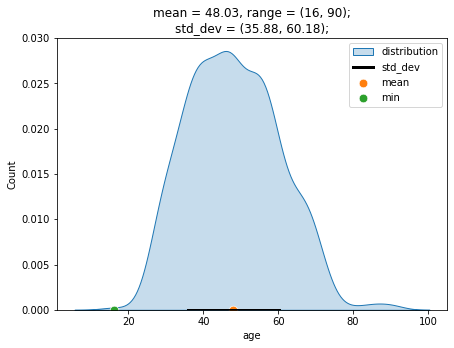

In [25]:
univariate_kde(df, 'age')

**Insights :**
* The average age of the patients in our dataset is 48.
* The oldest person on our dataset is 90 years old, while the youngest is 16 years old

<AxesSubplot:xlabel='gender', ylabel='count'>

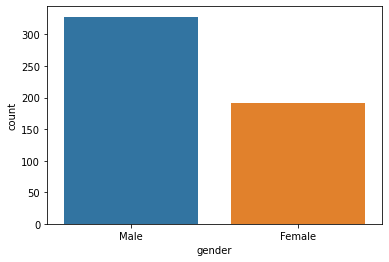

In [35]:
sns.countplot('gender', data = df)

**There are more males in our dataset than females**

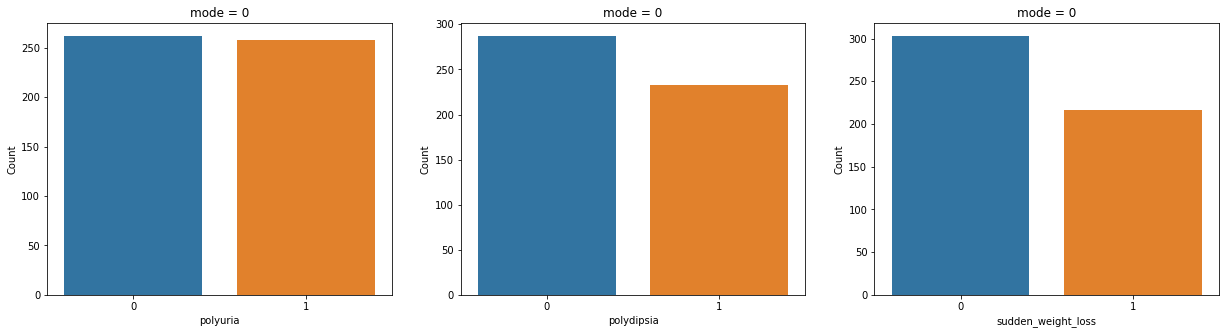

In [27]:
univariate_countplot(df, ['polyuria', 'polydipsia', 'sudden_weight_loss'])

**Insights :**
* As we can see from the graph, there is almost a 50-50 split in polyuria, while there are more people who did not experience polydipsia or sudden weight loss

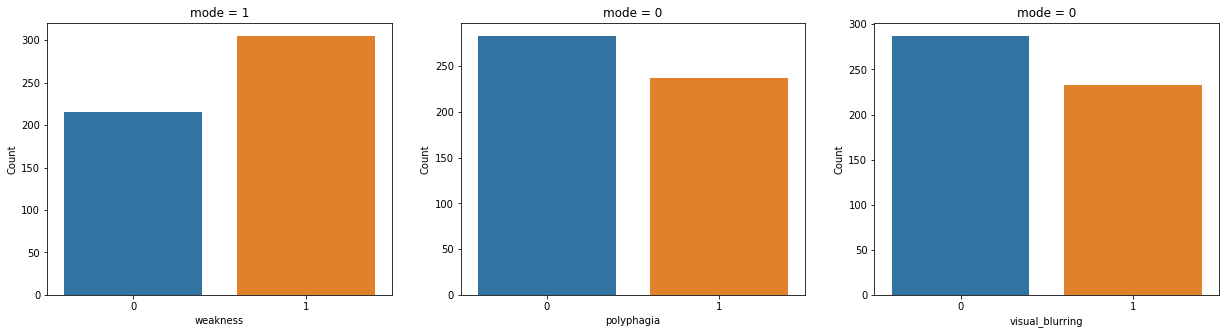

In [29]:
univariate_countplot(df, ['weakness', 'polyphagia', 'visual_blurring'])

**Insights :**
* There are more people who have weakness.
* There are more people who say they did not have polyphagia or visual blurring

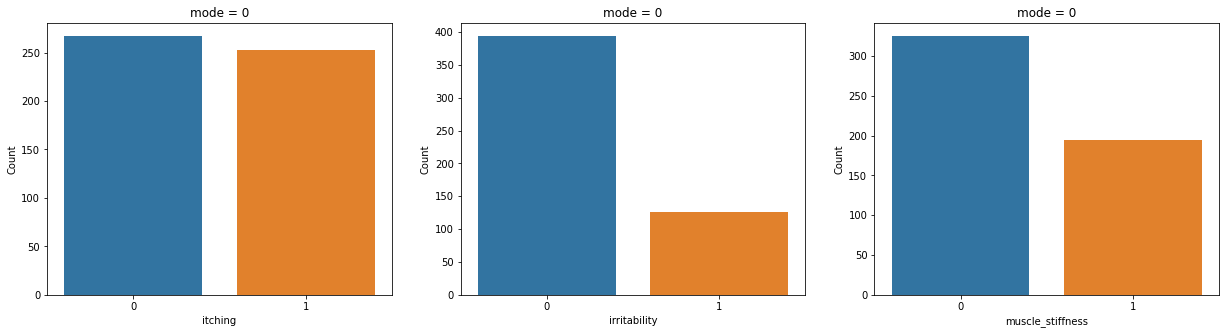

In [31]:
univariate_countplot(df, ['itching', 'irritability', 'muscle_stiffness'])

**Insights**
* Not many people suffered from irritabilty or muscle stiffness.
* The itching graph shows an almost 45-55 split

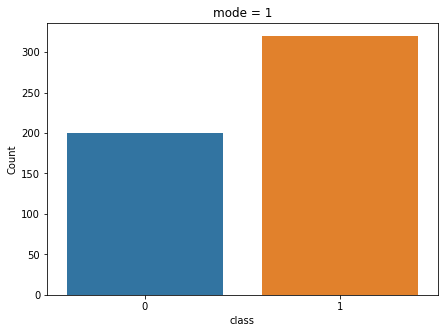

In [32]:
univariate_countplot(df, ['class'])

**Insights :**
* Here we can see that there are more people in our dataset who belong to the positive class (which means that they are diabetic).

## Bivariate Analysis

In [33]:
def bivariate_countplot(df, x_var, hue_var):
    '''
    df -> data
    x_var -> discrete value
    hue_var -> categorical variable
    '''
    size = len(x_var)
    plt.figure(figsize = (size * 7, 7))
    for i, x in enumerate(x_var):
        plt.subplot(1, size, i + 1)
        sns.countplot(x, hue = hue_var, data = df)
        

In [26]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

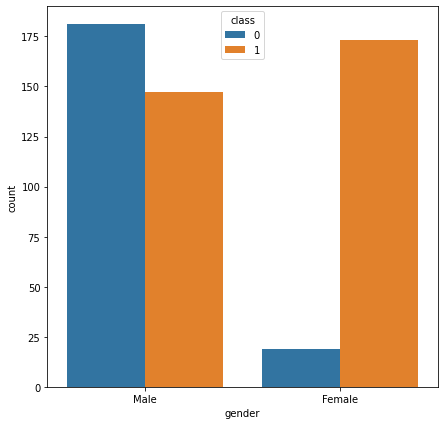

In [36]:
bivariate_countplot(df, ['gender'], 'class')

**Insights :**
* From the graph we can clearly see that females are at a higher risk of diabetes than the males.

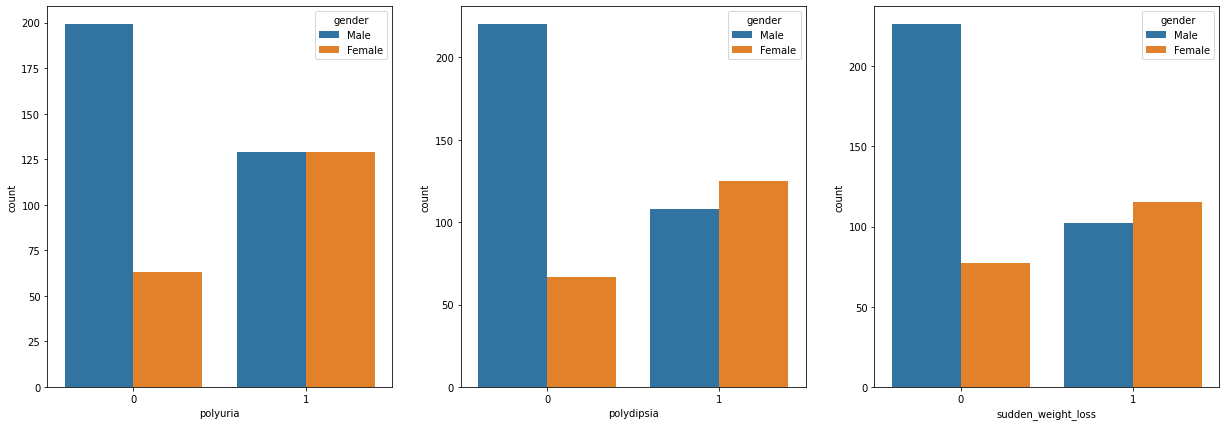

In [38]:
bivariate_countplot(df, ['polyuria', 'polydipsia', 'sudden_weight_loss'], 'gender')

**Insights :**
* It looks like diabetic females showed more symptoms than male diabetic patients

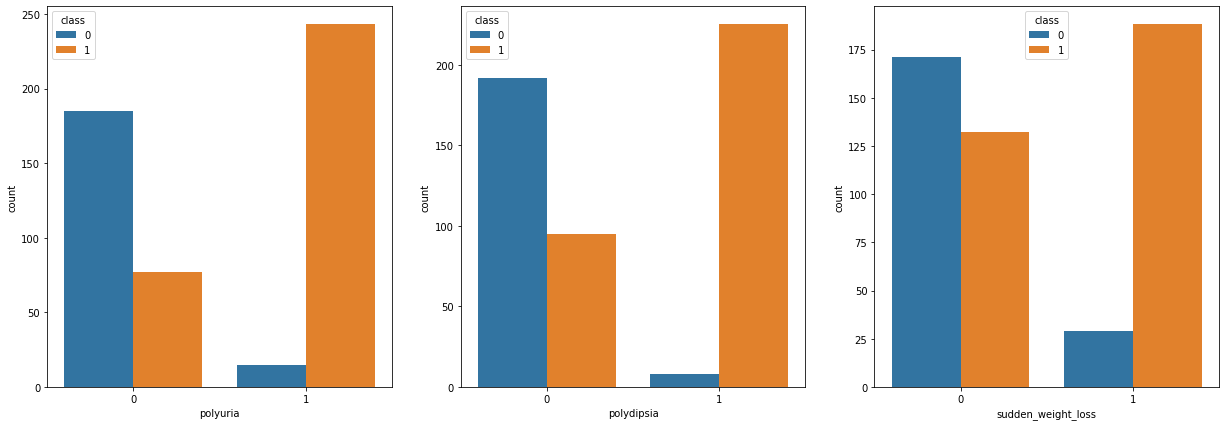

In [39]:
bivariate_countplot(df, ['polyuria', 'polydipsia', 'sudden_weight_loss'], 'class')

**Inisghts :**
* All Of the symptoms were suffered by diabetic patients, our machine learning models will be able to pickup on these trends too.

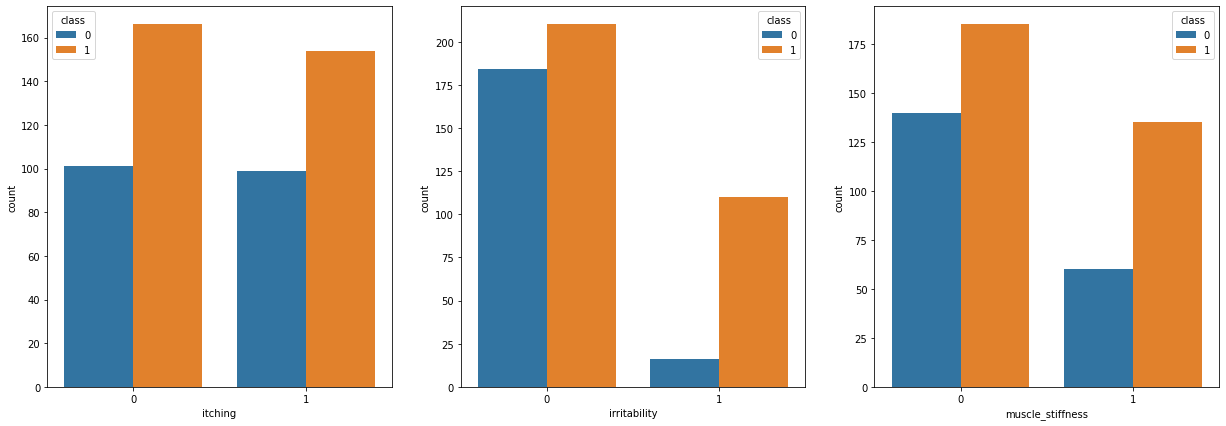

In [41]:
bivariate_countplot(df, ['itching', 'irritability', 'muscle_stiffness'], 'class')

**Insights :** 
* These are all symptoms which were experienced by both the classes (diabetic and non diabetic) which means these symptoms are probably not good differentiators when it comes to diabetes.

# Preprocessing

In [59]:
df.gender.replace({'Male' : 1, 'Female' : 0}, inplace = True)

In [60]:
from sklearn.model_selection import train_test_split
X = df.drop('class', axis = 1)
Y = df['class']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.25)

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain_scaled = sc.fit_transform(Xtrain)
Xtest_scaled = sc.transform(Xtest)

# Machine learning models

### SVM

In [63]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(Xtrain, Ytrain)
Ypred = svc.predict(Xtest)

In [64]:
from sklearn.metrics import classification_report

print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.59      1.00      0.74        77

    accuracy                           0.59       130
   macro avg       0.30      0.50      0.37       130
weighted avg       0.35      0.59      0.44       130



* Here we can see that a **support vector machine** model **failed to even acknowledge the negative class** and hence it has a very **low accuracy of 59%**.

### Decision Trees

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain, Ytrain)
Ypred = dtc.predict(Xtest)

In [67]:
print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        53
           1       0.94      0.97      0.96        77

    accuracy                           0.95       130
   macro avg       0.95      0.94      0.94       130
weighted avg       0.95      0.95      0.95       130



* We can see from the classification report that the **decision tree** model was able to predict both the classes with **95% accuracy**.

# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(Xtrain, Ytrain)
Ypred = rfc.predict(Xtest)

In [69]:
print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.96      1.00      0.98        77

    accuracy                           0.98       130
   macro avg       0.98      0.97      0.98       130
weighted avg       0.98      0.98      0.98       130



* We can see here that the random forest model has performed the best out of all the models, with an accuracy of 98%.
* Hence we will use this random forest model for any further predictions

In [73]:
import pickle

file = open('prediction.pkl', 'wb')

pickle.dump(rfc, file)